<a href="https://colab.research.google.com/github/BryanAlexanderSoetanto/Portfolio-Data-Analytics-Essentials/blob/main/QualityData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('ww2ships.csv.xlsx')

# Display the first few rows of the DataFrame to confirm successful loading
print("DataFrame 'df' loaded successfully. Here are the first 5 rows:")
print(df.head())

DataFrame 'df' loaded successfully. Here are the first 5 rows:
   Unnamed: 0        Name                       Class         Country  \
0           0  A(Planned)           No Classification         Germany   
1           1      ABSD-1           No Classification   United States   
2           2      ABSD-2           No Classification   United States   
3           3     Abukuma  Nagara-class Light Cruiser           Japan   
4           4      Acasta     A and B-class Destroyer  United Kingdom   

  Launch Year  
0         NaN  
1         NaN  
2         NaN  
3        1923  
4        1929  


In [2]:
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

print("\nShape of the DataFrame (rows, columns):")
print(df.shape)

print("\nConcise summary of the DataFrame (data types and non-null values):")
df.info()


First 5 rows of the DataFrame:
   Unnamed: 0        Name                       Class         Country  \
0           0  A(Planned)           No Classification         Germany   
1           1      ABSD-1           No Classification   United States   
2           2      ABSD-2           No Classification   United States   
3           3     Abukuma  Nagara-class Light Cruiser           Japan   
4           4      Acasta     A and B-class Destroyer  United Kingdom   

  Launch Year  
0         NaN  
1         NaN  
2         NaN  
3        1923  
4        1929  

Shape of the DataFrame (rows, columns):
(1786, 5)

Concise summary of the DataFrame (data types and non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1786 non-null   int64 
 1   Name         1786 non-null   object
 2   Class        1786 non-null   object
 3 

In [3]:
missing_values = df.isnull().sum()
missing_percentage = 100 * df.isnull().sum() / len(df)

missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

print("\nMissing values count and percentage per column:")
print(missing_info)


Missing values count and percentage per column:
             Missing Count  Missing Percentage
Launch Year            658           36.842105


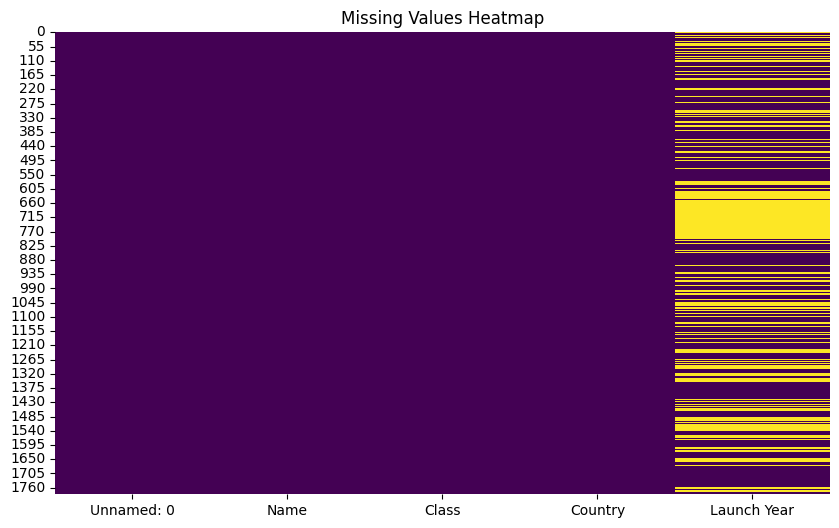

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [5]:
df['Launch Year'] = pd.to_numeric(df['Launch Year'], errors='coerce')

print("\nDescriptive statistics for numerical columns (excluding 'Unnamed: 0'):")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Unnamed: 0', errors='ignore')
if not numerical_cols.empty:
    print(df[numerical_cols].describe())
else:
    print("No numerical columns found other than 'Unnamed: 0'.")


Descriptive statistics for numerical columns (excluding 'Unnamed: 0'):
       Launch Year
count  1061.000000
mean   1934.381715
std      60.044688
min       0.000000
25%    1935.000000
50%    1939.000000
75%    1942.000000
max    1946.000000


In [6]:
print("\nDescriptive statistics for categorical columns:")
categorical_cols = df.select_dtypes(include='object').columns.drop('Name', errors='ignore') # Exclude 'Name' due to high cardinality

if not categorical_cols.empty:
    for col in categorical_cols:
        print(f"\nColumn: {col}")
        print(f"Number of unique values: {df[col].nunique()}")
        print("Top 5 most frequent values:")
        print(df[col].value_counts().head(5))
else:
    print("No categorical columns found.")


Descriptive statistics for categorical columns:

Column: Class
Number of unique values: 292
Top 5 most frequent values:
Class
M-class Minesweeper         293
Type VII-class Submarine    143
Balao-class Submarine       103
Type IX-class Submarine      90
Gato-class Submarine         75
Name: count, dtype: int64

Column: Country
Number of unique values: 15
Top 5 most frequent values:
Country
Germany           957
United States     473
Japan             154
United Kingdom     81
Italy              41
Name: count, dtype: int64


In [7]:
duplicate_rows = df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_rows}")

Total number of duplicate rows: 0


In [8]:
print("Current DataFrame Information:")
df.info()

Current DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1786 non-null   int64  
 1   Name         1786 non-null   object 
 2   Class        1786 non-null   object 
 3   Country      1786 non-null   object 
 4   Launch Year  1061 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 69.9+ KB


In [9]:
print("\nAnalyzing unique values for categorical columns:")
for col in categorical_cols:
    print(f"\nUnique values for column '{col}':")
    # If the number of unique values is very large, only print the head to avoid excessive output
    if df[col].nunique() > 50:
        print(df[col].value_counts().index.tolist()[:50]) # Print top 50 unique values
    else:
        print(df[col].unique())


Analyzing unique values for categorical columns:

Unique values for column 'Class':
['M-class Minesweeper', 'Type VII-class Submarine', 'Balao-class Submarine', 'Type IX-class Submarine', 'Gato-class Submarine', 'No Classification', 'Type XXI-class Submarine', 'Type II-class Submarine', 'Fletcher-class Destroyer', 'S-class Submarine', 'Spähkreuzer 1938-class Scout Cruiser', 'Soldati-class Destroyer', 'Casablanca-class Escort Carrier', '1939-class Motor Torpedo Boat', '1941-class Motor Torpedo Boat', '1935-class Motor Torpedo Boat', 'M-class Light Cruiser', 'P-class Heavy Cruiser', 'Essex-class Aircraft Carrier', 'Tambor-class Submarine', '1934A-class Destroyer', 'Type XIV-class Cargo Submarine', 'Porpoise-class Submarine', 'F-class Destroyer Escort', 'Tench-class Submarine', 'Sargo-class Submarine', '1937-class Motor Torpedo Boat', 'Independence-class Light Carrier', '1944-class Motor Torpedo Boat', 'Evarts-class Destroyer Escort', '1936A-class Destroyer', '1936B-class Destroyer', 'Ne

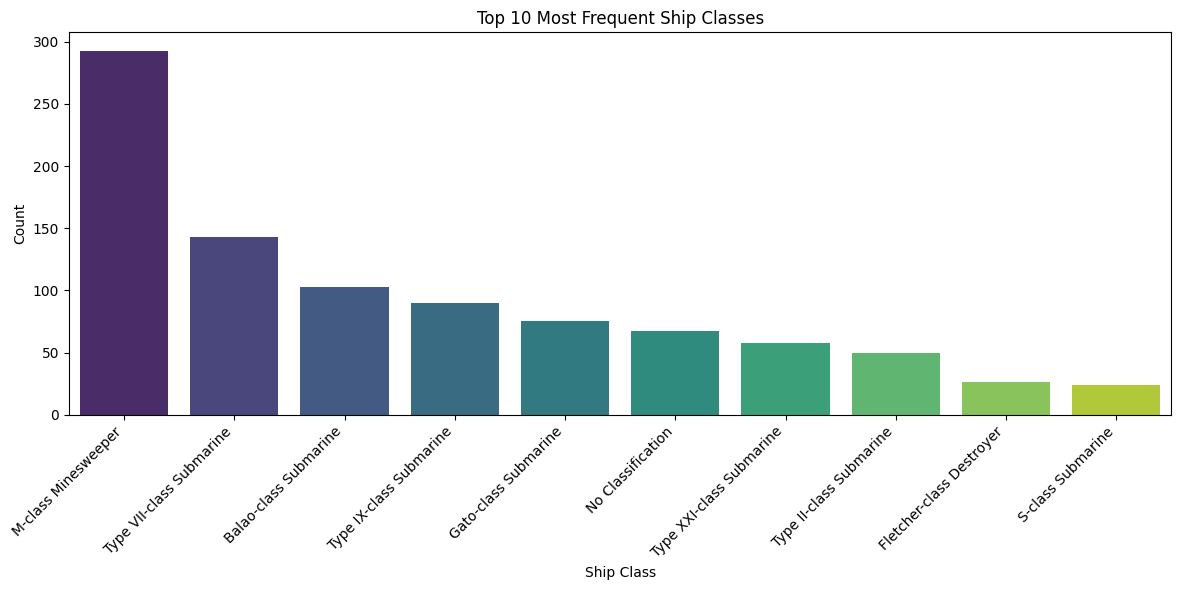

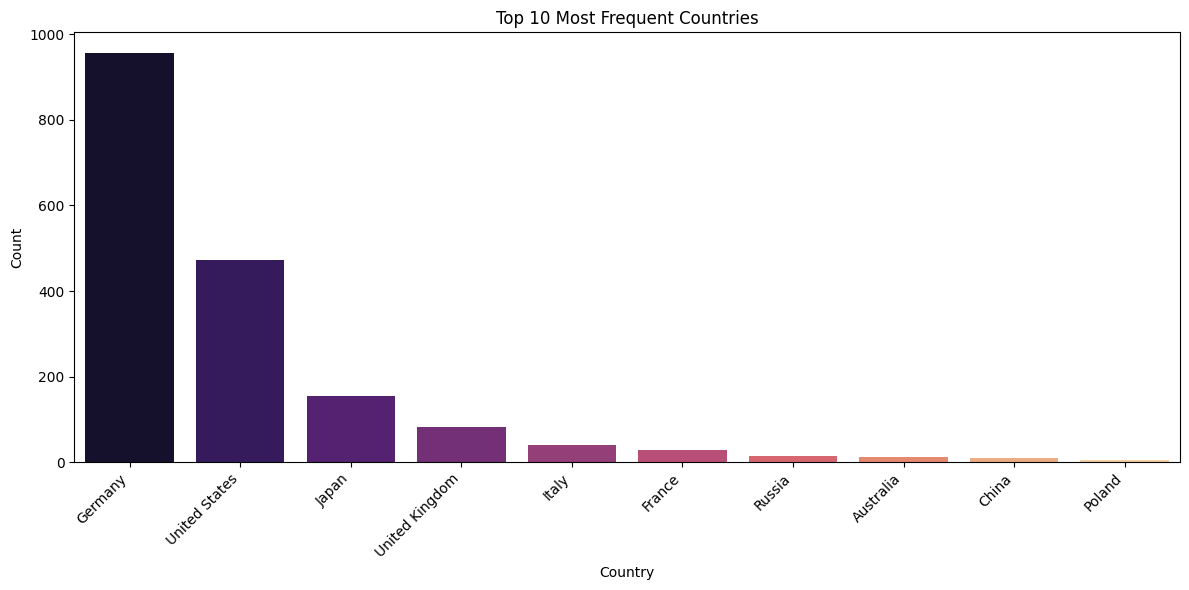

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for 'Class' column (top 10 most frequent)
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Class'].value_counts().head(10).index, y=df['Class'].value_counts().head(10).values, hue=df['Class'].value_counts().head(10).index, palette='viridis', legend=False)
plt.title('Top 10 Most Frequent Ship Classes')
plt.xlabel('Ship Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot for 'Country' column (all unique countries or top 10 if more)
plt.figure(figsize=(12, 6))
country_counts = df['Country'].value_counts()
if len(country_counts) > 10:
    sns.barplot(x=country_counts.head(10).index, y=country_counts.head(10).values, hue=country_counts.head(10).index, palette='magma', legend=False)
    plt.title('Top 10 Most Frequent Countries')
else:
    sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette='magma', legend=False)
    plt.title('Distribution of Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

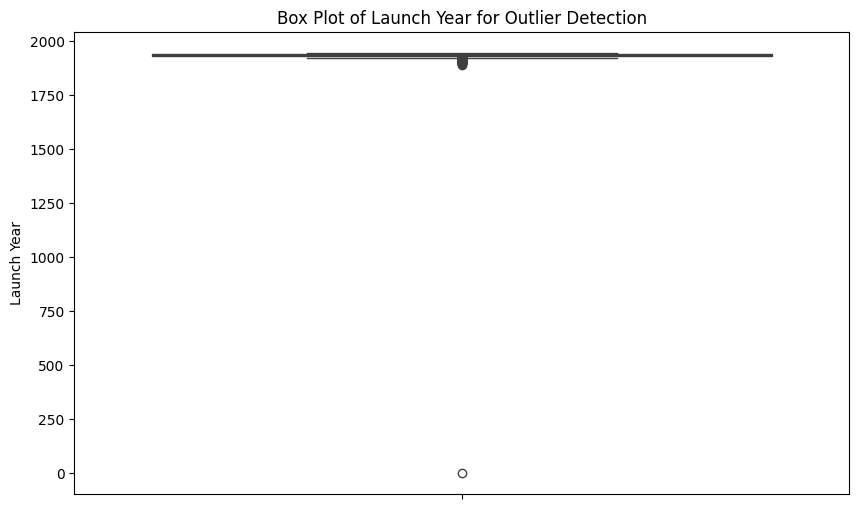


Interpretation of the Box Plot for 'Launch Year':
The box plot visually represents the distribution of 'Launch Year'.
Potential outliers are data points that extend beyond the 'whiskers' of the box plot.
Of particular note is the previously identified '0' value, which appears as a distinct outlier.
Other points outside the whiskers, especially on the lower end, might also indicate potential data entry errors or unusual historical data.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Launch Year'])
plt.title('Box Plot of Launch Year for Outlier Detection')
plt.ylabel('Launch Year')
plt.show()

print("\nInterpretation of the Box Plot for 'Launch Year':")
print("The box plot visually represents the distribution of 'Launch Year'.")
print("Potential outliers are data points that extend beyond the 'whiskers' of the box plot.")
print("Of particular note is the previously identified '0' value, which appears as a distinct outlier.")
print("Other points outside the whiskers, especially on the lower end, might also indicate potential data entry errors or unusual historical data.")